In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
import cv2
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,classification_report
from PIL import Image
import numpy as np
import cv2
from PIL import (Image,ImageFont,ImageDraw)   
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import tensorflow as tf
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import numpy as np


# Visulize Cat Images

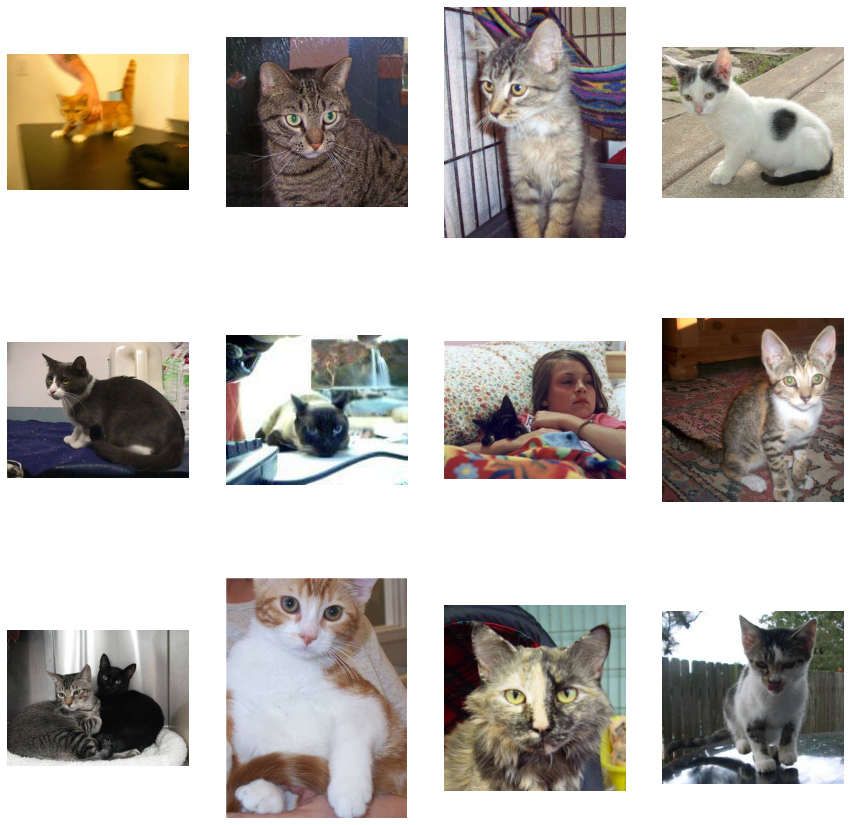

In [44]:
cat_images="../input/dogs-vs-cats/train/train/"
plt.figure(figsize=(15,15))

for i in range(12):
    plt.subplot(3,4,i+1)

    file_name=cat_images+"cat."+str(i)+".jpg"
    load_image=imread(file_name)
    plt.imshow(load_image)
    plt.axis("off")

plt.show()

# Visualize Dog Images

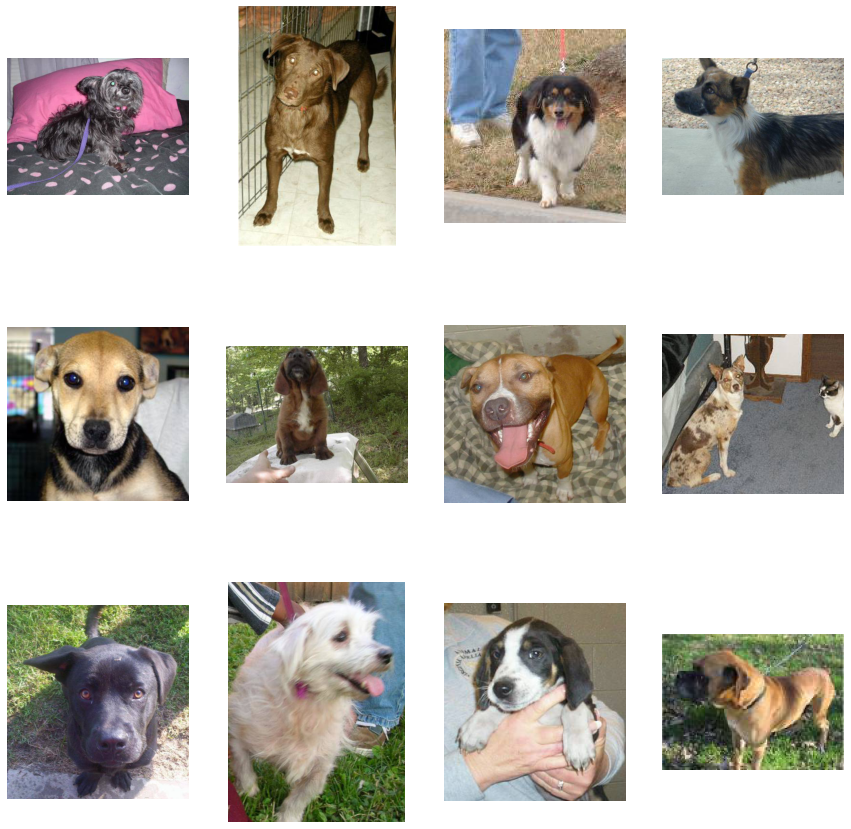

In [45]:
dog_images="../input/dogs-vs-cats/train/train/"

plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)

    file_name=dog_images+"dog."+str(i)+".jpg"
    load_image=imread(file_name)
    plt.imshow(load_image)
    plt.axis("off")

plt.show()

In [5]:
image_path="../input/dogs-vs-cats/train/train/"

In [6]:
Image_Width=227
Image_Height=227
image_size=(Image_Width,Image_Height)
Image_Channels=3

In [7]:
image_data=os.listdir("../input/dogs-vs-cats/train/train/")

In [8]:
label_list=[]
for file_name in image_data:
    label=file_name.split(".")[0]
    if(label=="dog"):
        label_list.append("dog")
    else:
        label_list.append("cat")

final_data=pd.DataFrame({"filename":image_data,"label":label_list})
        
    

In [48]:
final_data.head()

,filename,label
0,cat.12461.jpg,cat
1,dog.3443.jpg,dog
2,dog.7971.jpg,dog
3,dog.10728.jpg,dog
4,dog.1942.jpg,dog


# Splitting Training and Testing data

In [10]:
X_train, X_test = train_test_split(final_data, test_size=0.20, random_state=42)

X_train= X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [11]:
total_train=X_train.shape[0]
total_test=X_test.shape[0]


In [12]:
total_train=X_train.shape[0]
total_test=X_test.shape[0]
batch_size=10

# Generate data for training and validation

In [13]:
train_data_generator= ImageDataGenerator(rotation_range=15,
                                       rescale=1./255,
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1)



traindata_generator=train_data_generator.flow_from_dataframe(X_train,image_path,x_col="filename",y_col="label",target_size=image_size,
                                                            class_mode="categorical",batch_size=batch_size)




Found 20000 validated image filenames belonging to 2 classes.


In [14]:
valid_data_generator=ImageDataGenerator(rescale=1./255)

validdata_generator=valid_data_generator.flow_from_dataframe(X_test,image_path,x_col="filename",y_col="label",target_size=image_size,
                                                            class_mode="categorical",batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [15]:
test_data_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

testdata_generator = train_data_generator.flow_from_dataframe(X_train,
                                                 image_path,x_col='filename',y_col='label',
                                                 target_size=image_size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create  AlexNet Model

In [17]:
model=Sequential()

#1st Conv2D Layer

model.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))

#2nd Conv2D Layer

model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))


#3rd Conv2D Layer

model.add(Conv2D(384,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#4th Conv2D Layer

model.add(Conv2D(384,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))


#5th Conv2D Layer

model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(1000,activation="relu"))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2,activation="softmax"))

model.compile(loss="categorical_crossentropy" ,optimizer="adam",metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0

In [19]:
history=model.fit(traindata_generator,epochs=30,validation_data=validdata_generator,validation_steps=total_test//batch_size,steps_per_epoch=total_train//batch_size)

Epoch 1/30
2000/2000 [==============================] - 326s 161ms/step - loss: 0.7406 - accuracy: 0.5452 - val_loss: 0.7597 - val_accuracy: 0.5730
Epoch 2/30
2000/2000 [==============================] - 331s 165ms/step - loss: 0.6780 - accuracy: 0.6136 - val_loss: 0.6990 - val_accuracy: 0.4858
Epoch 3/30
2000/2000 [==============================] - 332s 166ms/step - loss: 0.6442 - accuracy: 0.6436 - val_loss: 0.5765 - val_accuracy: 0.6908
Epoch 4/30
2000/2000 [==============================] - 333s 166ms/step - loss: 0.6132 - accuracy: 0.6806 - val_loss: 0.5594 - val_accuracy: 0.7270
Epoch 5/30
2000/2000 [==============================] - 328s 164ms/step - loss: 0.5727 - accuracy: 0.7171 - val_loss: 0.5865 - val_accuracy: 0.6936
Epoch 6/30
2000/2000 [==============================] - 330s 165ms/step - loss: 0.5305 - accuracy: 0.7498 - val_loss: 0.5865 - val_accuracy: 0.6706
Epoch 7/30
2000/2000 [==============================] - 333s 167ms/step - loss: 0.4710 - accuracy: 0.7879 - val_

# Accuracy Graph


Model Accuracy



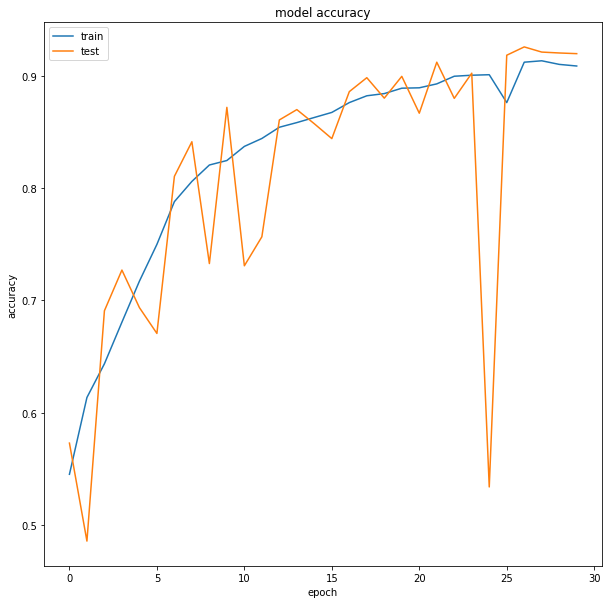

In [41]:
print("Model Accuracy\n")
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Graph

Model Loss



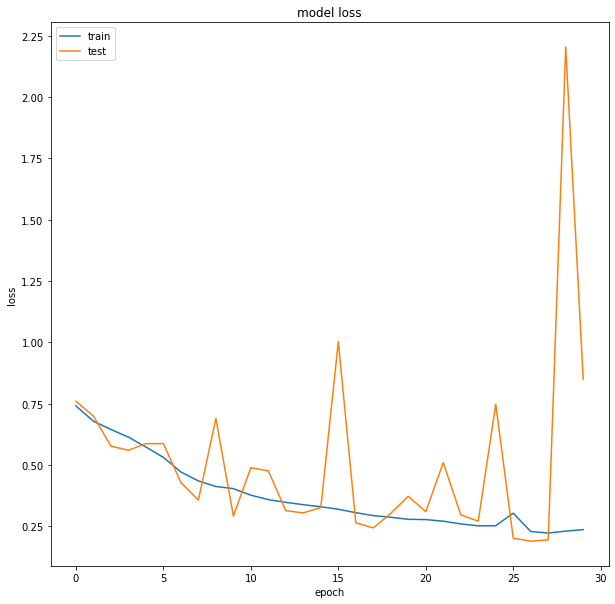

In [40]:
print("Model Loss\n")
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Prediction

In [36]:
predictions=model.predict(validdata_generator)
final_predict=np.argmax(predictions,axis=1)
true_data=validdata_generator.classes

# Confusion Matrix

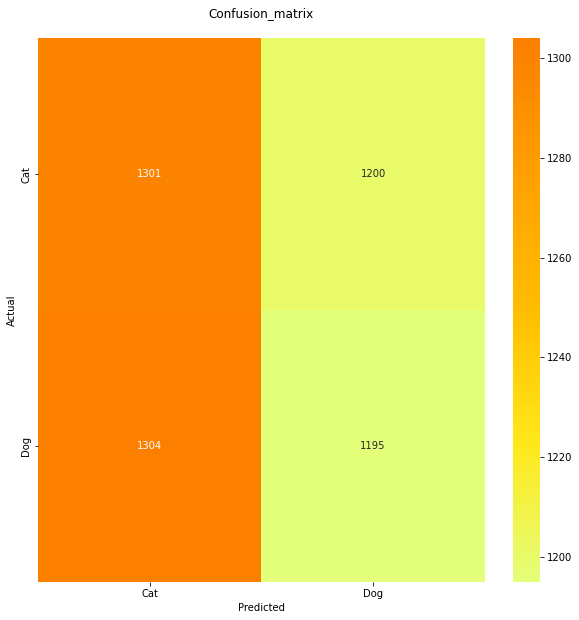

In [39]:
plt.figure(figsize=(10,10))
label_name=["Cat","Dog"]
cm = confusion_matrix(true_data,final_predict)
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="Wistia",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion_matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Classification Report

In [26]:
print(classification_report(validdata_generator.classes, predictions.argmax(axis=1),target_names=["Cat" , "Dog"]))

              precision    recall  f1-score   support

         Cat       0.51      0.53      0.52      2501
         Dog       0.51      0.49      0.50      2499

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



# Prediction System

In [27]:
test_images = os.listdir("../input/dogs-vs-cats/test/test/")
test_data = pd.DataFrame({   'filename': test_images})
 


In [28]:
number_samples=test_data.shape[0]

In [29]:

predict = model.predict(testdata_generator, steps=np.ceil(number_samples/batch_size))

In [30]:
test_data['label'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in traindata_generator.class_indices.items())
test_data["label"] = test_data['label'].replace(label_map)
test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })

In [79]:
test_data.head()

,filename,label
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1


 # Visualize the prediction results

In [32]:
sample_test = test_data.head(10)
sample_test.head()

,filename,label
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1


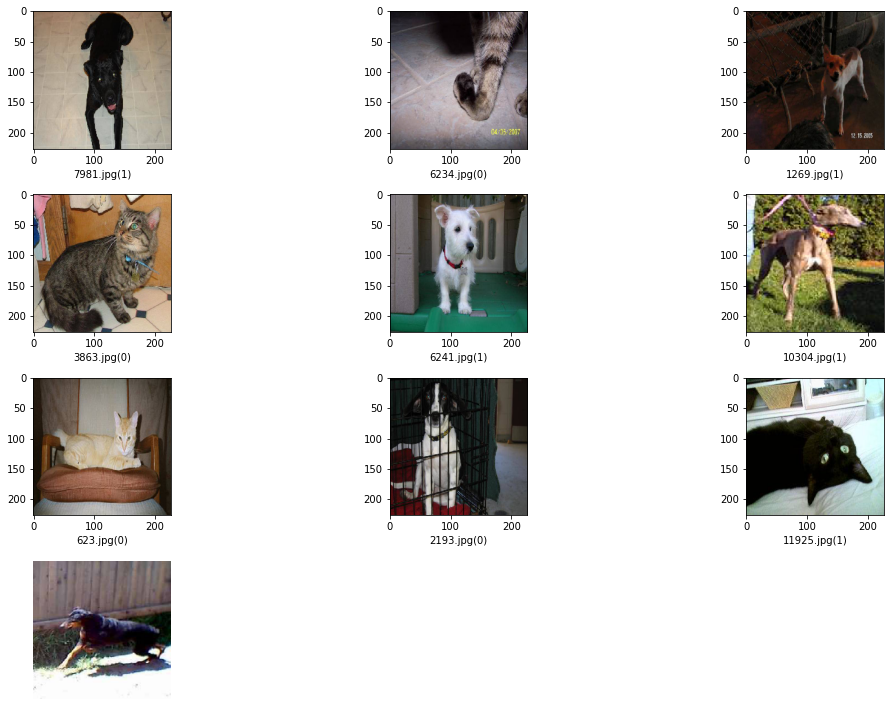

In [33]:

plt.figure(figsize=(15, 15))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img("../input/dogs-vs-cats/test/test/"+filename, target_size=image_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.axis("off")
plt.show()

# Test  model performance on custom data

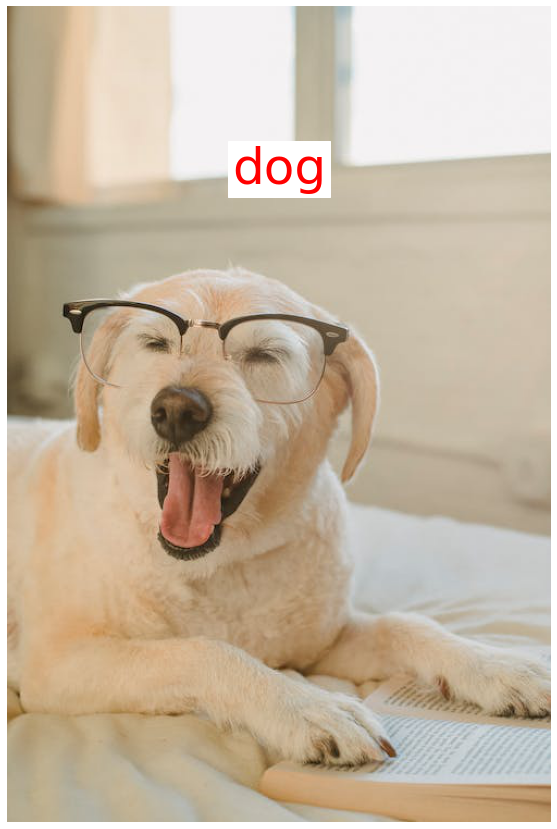

In [77]:
plt.figure(figsize=(15,15))
image_url = "https://images.pexels.com/photos/5257587/pexels-photo-5257587.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
response = requests.get(image_url)
test_image_path = Image.open(BytesIO(response.content))

height = 227
width = 227
channels = 3
input_shape = (height, width, channels)  
imge = test_image_path.resize((width, height))  
imge = np.expand_dims(imge, axis=0)
imge = np.array(imge) / 255
final_predct = np.argmax(model.predict([imge])[0])


label = results[final_predct]
plt.imshow(test_image_path)
plt.axis("off")
plt.text(0.5, 0.8, label, color='red',fontsize=50, backgroundcolor='white',
    horizontalalignment='center', verticalalignment='center',
    transform=plt.gca().transAxes)
plt.show()


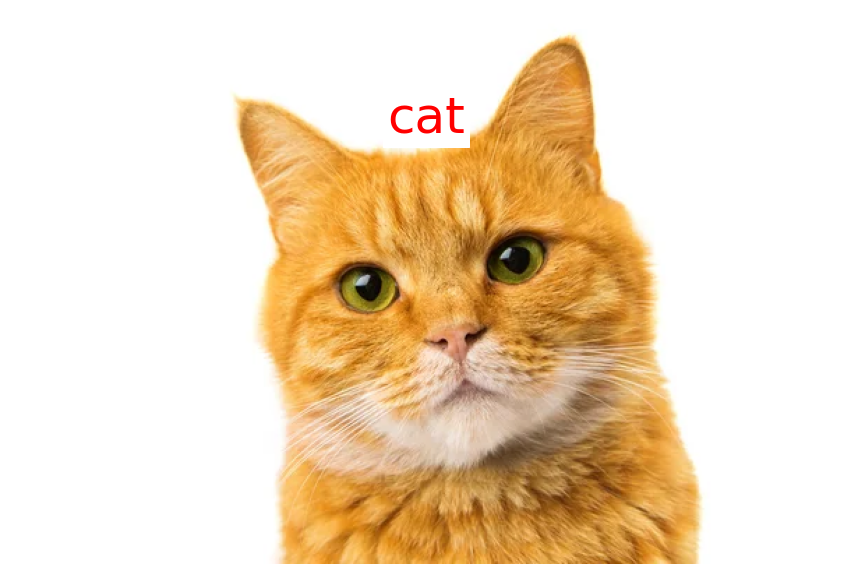

In [78]:
plt.figure(figsize=(15,15))
image_url = "https://st2.depositphotos.com/1000938/5499/i/450/depositphotos_54998613-stock-photo-ginger-cat.jpg"
response = requests.get(image_url)
test_image_path = Image.open(BytesIO(response.content))

height = 227
width = 227
channels = 3
input_shape = (height, width, channels)  
imge = test_image_path.resize((width, height))  
imge = np.expand_dims(imge, axis=0)
imge = np.array(imge) / 255
final_predct = np.argmax(model.predict([imge])[0])


label = results[final_predct]
plt.imshow(test_image_path)
plt.axis("off")
plt.text(0.5, 0.8, label, color='red',fontsize=50, backgroundcolor='white',
    horizontalalignment='center', verticalalignment='center',
    transform=plt.gca().transAxes)
plt.show()
